In [15]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

# Define the number of records
num_records = 1000

# Generate random data
data = {
    'CustomerID': range(1, num_records + 1),
    'Gender': [random.choice(['Male', 'Female']) for _ in range(num_records)],
    'Age': [random.randint(18, 70) for _ in range(num_records)],
    'Tenure': [random.randint(1, 72) for _ in range(num_records)],
    'MonthlyCharges': [round(random.uniform(20, 120), 2) for _ in range(num_records)],
    'TotalCharges': [round(random.uniform(100, 8000), 2) for _ in range(num_records)],
    'Contract': [random.choice(['Month-to-month', 'One year', 'Two year']) for _ in range(num_records)],
    'Churn': [random.choice(['Yes', 'No']) for _ in range(num_records)]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('telecom_data.csv', index=False)

print("Sample data: 'telecom_data.csv'")


Sample data: 'telecom_data.csv'


In [16]:
df.head()

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,Contract,Churn
0,1,Female,31,10,100.12,3833.92,Two year,Yes
1,2,Male,53,70,94.24,1118.25,One year,Yes
2,3,Male,30,38,116.80,1933.38,One year,No
3,4,Male,50,64,41.99,1840.88,Two year,Yes
4,5,Male,58,49,41.33,1799.09,Month-to-month,No


In [17]:
df.shape

(1000, 8)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      1000 non-null   int64  
 1   Gender          1000 non-null   object 
 2   Age             1000 non-null   int64  
 3   Tenure          1000 non-null   int64  
 4   MonthlyCharges  1000 non-null   float64
 5   TotalCharges    1000 non-null   float64
 6   Contract        1000 non-null   object 
 7   Churn           1000 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [19]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.258000,36.806000,71.023930,4013.877630
std,288.819436,15.325936,20.911185,29.020428,2299.822315
min,1.000000,18.000000,1.000000,20.080000,102.150000
25%,250.750000,30.000000,19.000000,46.440000,1984.152500
50%,500.500000,44.000000,36.500000,71.160000,3932.175000
75%,750.250000,56.250000,55.000000,96.077500,6046.937500
max,1000.000000,70.000000,72.000000,119.970000,7975.390000


In [20]:
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Tenure            0
MonthlyCharges    0
TotalCharges      0
Contract          0
Churn             0
dtype: int64

In [21]:
df.duplicated().sum()

0

In [22]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [23]:
gender_dummies = pd.get_dummies(df.Gender, prefix='Gender')
gender_dummies.head()

,Gender_Female,Gender_Male
0,True,False
1,False,True
2,False,True
3,False,True
4,False,True


In [24]:
df['Gender_Male'] = gender_dummies.Gender_Male
df['Gender_Female'] = gender_dummies.Gender_Female

df.head()

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,Contract,Churn,Gender_Male,Gender_Female
0,1,Female,31,10,100.12,3833.92,Two year,Yes,False,True
1,2,Male,53,70,94.24,1118.25,One year,Yes,True,False
2,3,Male,30,38,116.80,1933.38,One year,No,True,False
3,4,Male,50,64,41.99,1840.88,Two year,Yes,True,False
4,5,Male,58,49,41.33,1799.09,Month-to-month,No,True,False


In [25]:
df.Contract.unique()

array(['Two year', 'One year', 'Month-to-month'], dtype=object)

In [26]:
df['Contract'] = df.Contract.apply(lambda x: 'One_year' if x == 'One year' else x)
df['Contract'] = df.Contract.apply(lambda x: 'Two_year' if x == 'Two year' else x)

In [27]:
contract_dummies = pd.get_dummies(df.Contract, prefix='Contract')
contract_dummies.head()

,Contract_Month-to-month,Contract_One_year,Contract_Two_year
0,False,False,True
1,False,True,False
2,False,True,False
3,False,False,True
4,True,False,False


In [11]:
df.Churn.unique(), df.Churn.value_counts()

(array(['Yes', 'No'], dtype=object),
 Churn
 No     501
 Yes    499
 Name: count, dtype: int64)

<Axes: xlabel='Churn'>

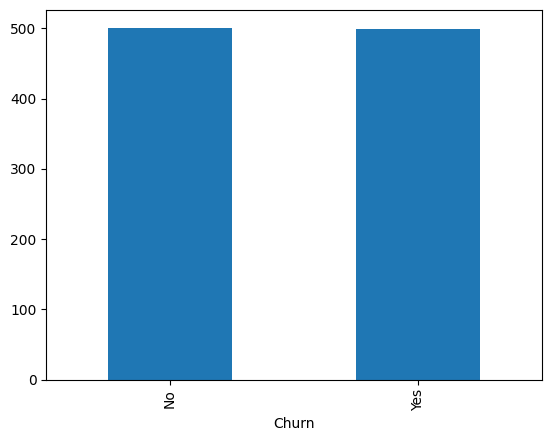

In [12]:
df.Churn.value_counts().plot.bar()

In [ ]:
df['Churn'] = df.Churn.apply(lambda x: 0 if x == 'No' else 1)